Code references from https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-instacart

In [29]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [30]:
DATASET_DIR = os.path.join(os.getcwd(), "../dataset/instacart-market-basket-analysis/")
dataset_files = [file for file in os.listdir(DATASET_DIR) if file.endswith(".csv")]

In [31]:
# load dataset to dictionary
dataset = {}
for file in dataset_files:
    filename = file.split(".")[0]+"_df"
    dataset[filename] = pd.read_csv(os.path.join(DATASET_DIR,file))

/Users/nelsonlim/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


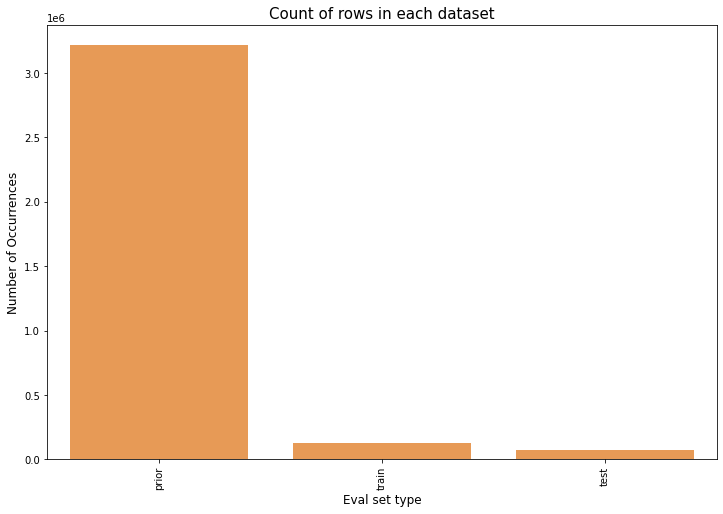

In [32]:
cnt_srs = dataset['orders_df'].eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

/Users/nelsonlim/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


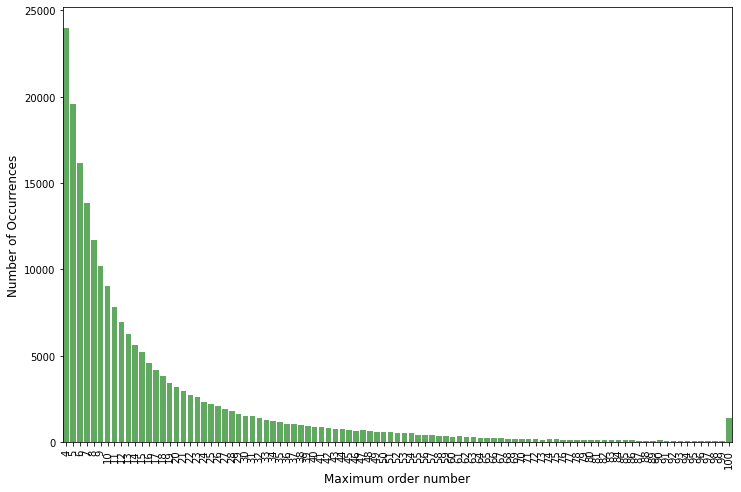

In [46]:
cnt_srs = dataset['orders_df'].groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

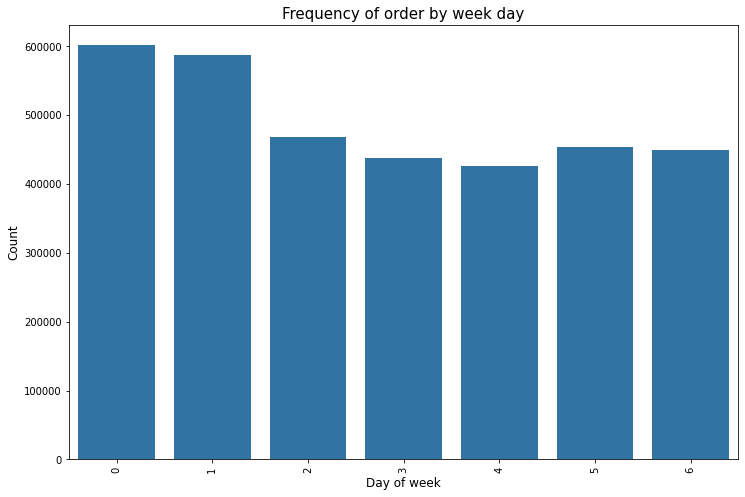

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=dataset['orders_df'], color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

Day of week 0 and 1 are Saturday and Sunday.

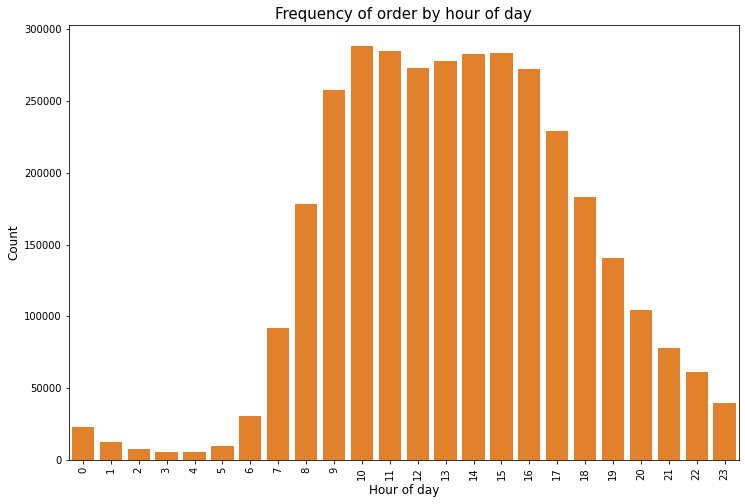

In [50]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=dataset['orders_df'], color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

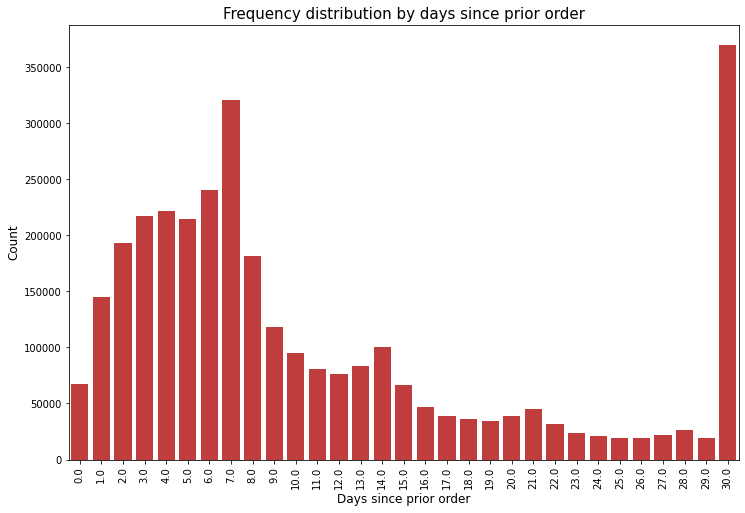

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=dataset['orders_df'], color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

/Users/nelsonlim/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


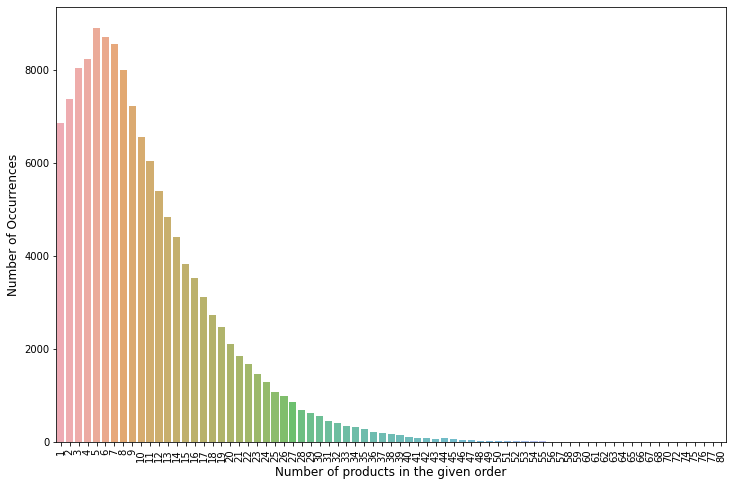

In [54]:
grouped_df = dataset['order_products__train_df'].groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Merge product details

In [90]:
total_products_pd = pd.merge(dataset['products_df'], dataset['aisles_df'], on='aisle_id', how='left')
total_products_pd = pd.merge(total_products_pd, dataset['departments_df'], on='department_id', how='left')
total_products_pd

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [93]:
total_products_pd[['aisle', 'department']].value_counts().sort_index()

aisle                          department   
air fresheners candles         household         355
asian foods                    international     605
baby accessories               babies             44
baby bath body care            babies            132
baby food formula              babies            718
                                                ... 
trash bags liners              household         112
vitamins supplements           personal care    1038
water seltzer sparkling water  beverages         344
white wines                    alcohol           147
yogurt                         dairy eggs       1026
Length: 134, dtype: int64

         department  frequency_count
0     personal care             6563
1            snacks             6264
2            pantry             5371
3         beverages             4365
4            frozen             4007
5        dairy eggs             3449
6         household             3085
7      canned goods             2092
8   dry goods pasta             1858
9           produce             1684
10           bakery             1516
11             deli             1322
12          missing             1258
13    international             1139
14        breakfast             1115
15           babies             1081
16          alcohol             1054
17             pets              972
18     meat seafood              907
19            other              548
20             bulk               38


/Users/nelsonlim/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


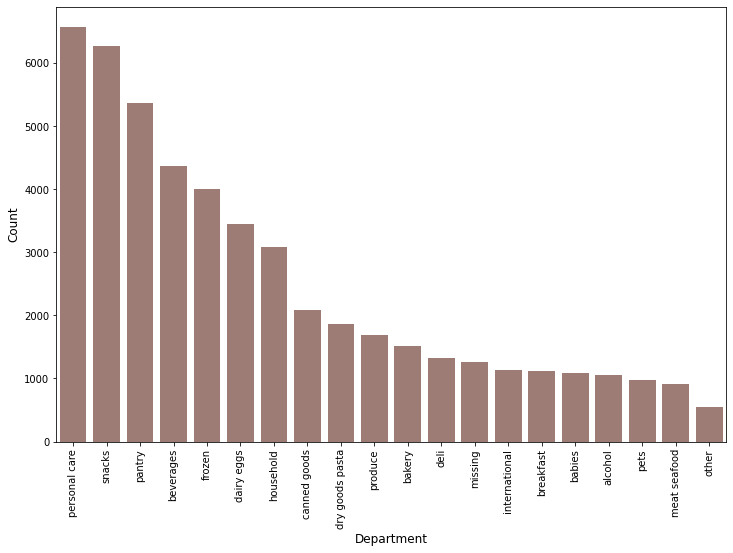

In [137]:
cnt_srs = total_products_pd['department'].value_counts().reset_index()
cnt_srs.columns = ['department', 'frequency_count']
print(cnt_srs)

total_cnt = 20
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.department[:total_cnt], cnt_srs.frequency_count[:total_cnt], alpha=0.8, color=color[5])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

                            aisle  frequency_count
0                         missing             1258
1                 candy chocolate             1246
2                   ice cream ice             1091
3            vitamins supplements             1038
4                          yogurt             1026
..                            ...              ...
129                  frozen juice               47
130              baby accessories               44
131              packaged produce               32
132  bulk grains rice dried goods               26
133  bulk dried fruits vegetables               12

[134 rows x 2 columns]


/Users/nelsonlim/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


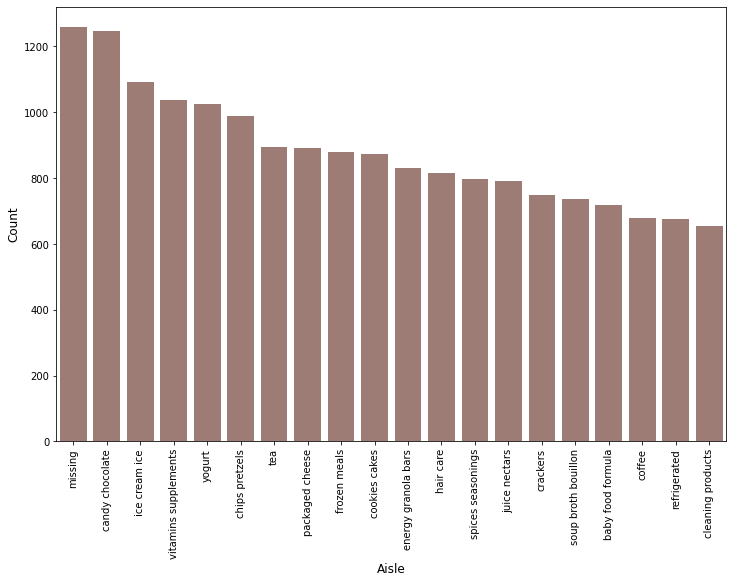

In [135]:
cnt_srs = total_products_pd['aisle'].value_counts().reset_index()
cnt_srs.columns = ['aisle', 'frequency_count']
print(cnt_srs)

total_cnt = 20
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.aisle[:total_cnt], cnt_srs.frequency_count[:total_cnt], alpha=0.8, color=color[5])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Merge product details with order_prior details

In [89]:
order_products_prior_df = pd.merge(dataset['order_products__prior_df'], dataset['products_df'], on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, dataset['aisles_df'], on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, dataset['departments_df'], on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [103]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


/Users/nelsonlim/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


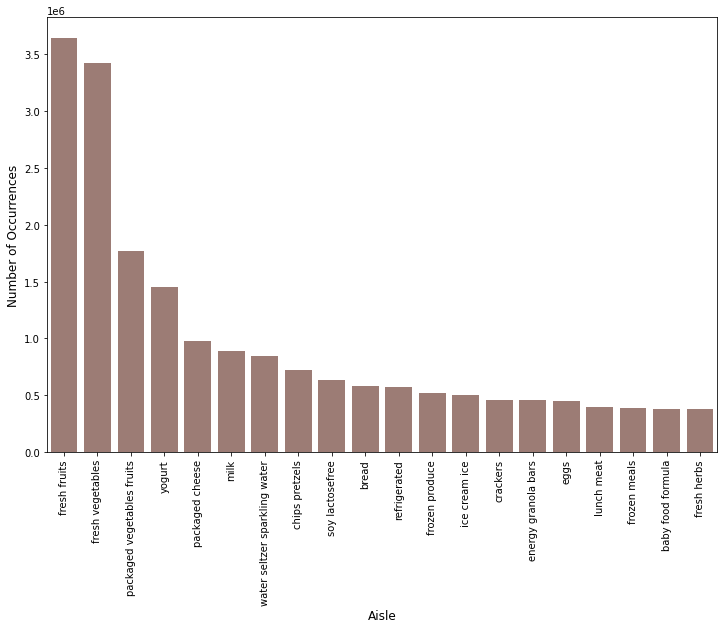

In [104]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

/Users/nelsonlim/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


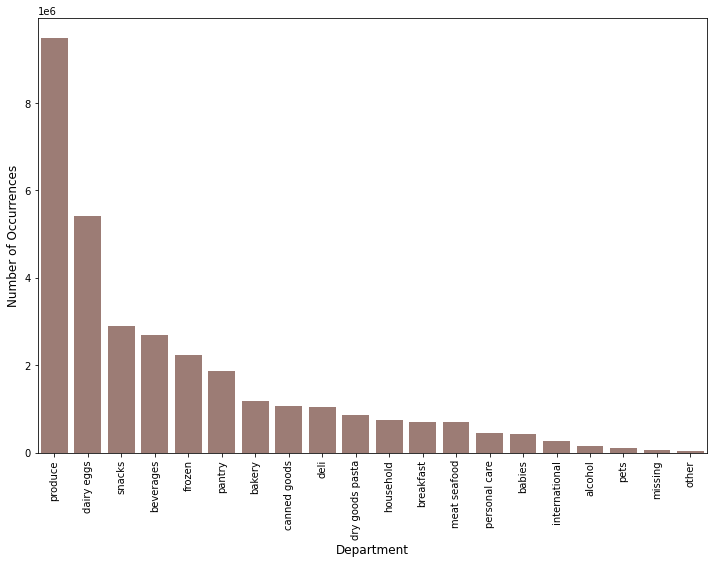

In [126]:
cnt_srs = order_products_prior_df['department'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [106]:
cnt_srs = order_products_prior_df['department'].value_counts().reset_index().head(20)
cnt_srs.columns = ['department', 'frequency_count']
cnt_srs

,department,frequency_count
0,produce,9479291
1,dairy eggs,5414016
2,snacks,2887550
3,beverages,2690129
4,frozen,2236432
5,pantry,1875577
6,bakery,1176787
7,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627
